In [1]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Import Labels

In [2]:
dataset_dir = '/scratch/smkatz/class/CS231A/E16Data/'
labels = pd.read_csv(dataset_dir + 'labels.csv')

In [3]:
labels

,filename,crosstrack,heading,downtrack,leftx1,lefty1,leftx2,lefty2,rightx1,righty1,rightx2,righty2
0,0.png,-4.521357,-13.384682,250.657815,701.839037,558.436125,738.520273,572.295265,655.502839,558.700963,567.463241,573.646962
1,1.png,0.913144,-28.959157,250.657815,356.764472,560.250233,433.207463,574.560256,299.753953,560.789870,225.265678,577.615792
2,2.png,5.303935,18.729172,250.657815,1385.458131,559.026179,1489.649604,574.164256,1336.422948,558.878512,1307.119709,572.817850
3,3.png,-0.491137,-10.227457,250.657815,775.393188,558.169492,832.711043,571.691143,730.265032,558.389987,667.639808,572.747663
4,4.png,-4.635729,13.189644,250.657815,1243.093763,558.522354,1282.943377,572.913525,1197.152631,558.452534,1116.491650,572.102577
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995.png,-2.648472,-0.523640,349.536868,970.453241,558.862430,1113.850706,600.440863,918.093871,558.981944,700.951469,601.286701
9996,9996.png,4.000929,12.993361,349.536868,1262.980305,559.409779,1549.064917,605.093153,1207.620013,559.319664,1099.375105,600.460656
9997,9997.png,6.378581,27.007366,349.536868,1597.987988,561.446282,2043.366525,618.415909,1531.088111,561.073185,1453.887748,605.223292
9998,9998.png,0.245740,-11.235758,349.536868,760.697944,559.114655,946.810740,599.298592,706.292959,559.403464,518.200749,604.383029


In [4]:
labels.loc[labels['filename'] == '0.png'].iloc[0]['rightx1']

655.502839

# Visualize Lines

In [5]:
def get_pixels(line, sw):
    a, b, c = line
    xs = np.arange(0, sw, 1)
    ys = [-(a / b) * x + (-c / b) for x in xs]
    return xs, ys

def plot_image_with_label(dataset_dir, filename):
    # Load the image
    img = np.array(cv2.cvtColor(cv2.imread(dataset_dir + filename), cv2.COLOR_BGRA2BGR)[:, :, ::-1])
    # Get the lines for plotting
    data = labels.loc[labels['filename'] == filename].iloc[0]
    rightx1, righty1, rightx2, righty2 = data['rightx1'], data['righty1'], data['rightx2'], data['righty2']
    leftx1, lefty1, leftx2, lefty2 = data['leftx1'], data['lefty1'], data['leftx2'], data['lefty2']
    right_line = np.cross(
        np.array([rightx1, righty1, 1]), np.array([rightx2, righty2, 1]))
    left_line = np.cross(
        np.array([leftx1, lefty1, 1]), np.array([leftx2, lefty2, 1]))
    sw = img.shape[1]
    xright, yright = get_pixels(right_line, sw)
    xleft, yleft = get_pixels(left_line, sw)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(img)
    # plt.scatter([x1, x2], [y1, y2], c='red')
    # plt.scatter([x3, x4], [y3, y4], c='red')
    plt.plot(xright, yright, c='lime', linewidth=2.0)
    plt.plot(xleft, yleft, c='lime', linewidth=2.0)
    # plt.axis('off')


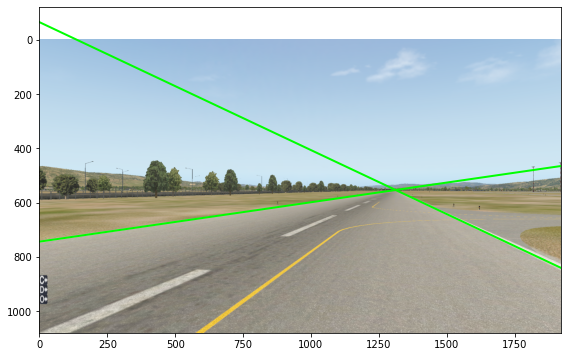

In [6]:
plot_image_with_label(dataset_dir, '9999.png')

# Test some downsampling

In [7]:
dataset_dir = '/scratch/smkatz/class/CS231A/E16Data/'
filename = '6.png'
img = np.array(cv2.cvtColor(cv2.imread(dataset_dir + filename),
               cv2.COLOR_BGRA2BGR)[:, :, ::-1])
data = labels.loc[labels['filename'] == filename].iloc[0]
rightx1, righty1, rightx2, righty2 = data['rightx1'], data['righty1'], data['rightx2'], data['righty2']
leftx1, lefty1, leftx2, lefty2 = data['leftx1'], data['lefty1'], data['leftx2'], data['lefty2']
right_line = np.cross(np.array([rightx1, righty1, 1]), np.array([rightx2, righty2, 1]))
left_line = np.cross(np.array([leftx1, lefty1, 1]), np.array([leftx2, lefty2, 1]))

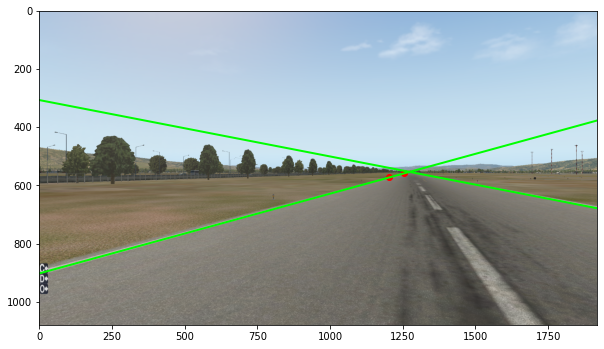

In [8]:
sw = img.shape[1]
sh = img.shape[0]
xright, yright = get_pixels(right_line, sw)
xleft, yleft = get_pixels(left_line, sw)

plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.plot(xright, yright, c='lime', linewidth=2.0)
plt.plot(xleft, yleft, c='lime', linewidth=2.0)
plt.scatter([rightx1, rightx2], [righty1, righty2], c='red')

In [9]:
def get_resized_line(pt1x, pt1y, pt2x, pt2y, factorw, factorh):
    return np.cross(np.array([factorw * pt1x, factorh * pt1y, 1]), np.array([factorw * pt2x, factorh * pt2y, 1]))

In [10]:
img_resized = cv2.resize(img, (360, 200))
factorw = 360 / sw
factorh = 200 / sh
right_line_resized = get_resized_line(rightx1, righty1, rightx2, righty2, factorw, factorh)
left_line_resized = get_resized_line(leftx1, lefty1, leftx2, lefty2, factorw, factorh)

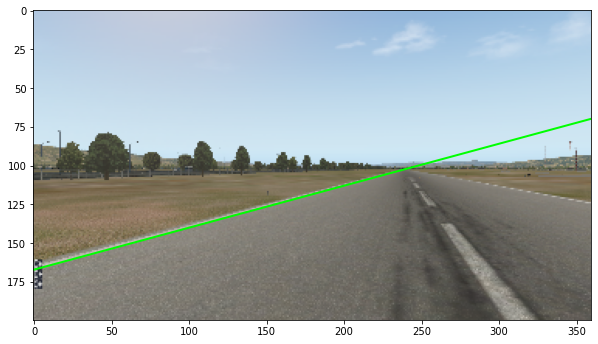

In [11]:
xright, yright = get_pixels(right_line_resized, 360)
xleft, yleft = get_pixels(left_line_resized, 360)

plt.figure(figsize=(10, 6))
plt.imshow(img_resized)
plt.plot(xright, yright, c='lime', linewidth=2.0)

In [12]:
def get_cropped_line(pt1x, pt1y, pt2x, pt2y, factorw, factorh, cropy):
    return np.cross(np.array([factorw * pt1x, factorh * pt1y - cropy, 1]), np.array([factorw * pt2x, factorh * pt2y - cropy, 1]))

In [13]:
img_cropped = img[504:, :, :]
right_line_cropped = get_cropped_line(
    rightx1, righty1, rightx2, righty2, 1, 1, 100)
left_line_cropped = get_cropped_line(
    leftx1, lefty1, leftx2, lefty2, 1, 1, 100)

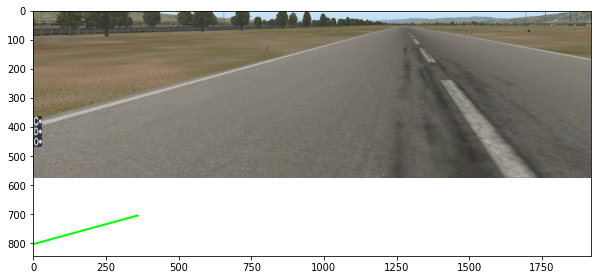

In [14]:
plt.figure(figsize=(10, 6))
plt.imshow(img_cropped)

xright, yright = get_pixels(right_line_cropped, 360)
xleft, yleft = get_pixels(left_line_cropped, 360)

# plt.scatter([rightx1 * factorw, rightx2 * factorw],
#             [righty1 * factorh - 100, righty2 * factorh - 100], c='red')
plt.plot(xright, yright, c='lime', linewidth=2.0)

In [15]:
def downsample_image(img, right_labels, left_labels):
    rightx1, righty1, rightx2, righty2 = right_labels
    leftx1, lefty1, leftx2, lefty2 = left_labels

    img_cropped = img[550:, :, :]
    img_downsampled = cv2.resize(img_cropped, (64, 64))
    img_grayscale = np.array(Image.fromarray(img_downsampled).convert('L')) / 255.0

    factor_w = 64 / sw
    factor_h = 64 / (sh - 550)

    right_line = np.cross(np.array([factor_w * rightx1, factor_h * (righty1 - 550), 1]), 
                          np.array([factor_w * rightx2, factor_h * (righty2 - 550), 1]))

    left_line = np.cross(np.array([factor_w * leftx1, factor_h * (lefty1 - 550), 1]),
                         np.array([factor_w * leftx2, factor_h * (lefty2 - 550), 1]))

    return img_grayscale, right_line, left_line


def downsample_image_v2(img, right_labels, left_labels):
    rightx1, righty1, rightx2, righty2 = right_labels
    leftx1, lefty1, leftx2, lefty2 = left_labels

    img_cropped = img[504:, :, :]
    img_grayscale = np.array(Image.fromarray(
        img_cropped).convert('L')) / 255.0
    
    h, w = img_grayscale.shape
    
    strideh = 9
    stridew = 30
    numPix = 32
    width = w//stridew
    height = h//strideh

    factor_h = 1 / strideh
    factor_w = 1 / stridew

    img_ds = np.zeros((height, width))
    for i in range(height):
        for j in range(width):
            img_ds[i, j] = np.mean(np.sort(
                img_grayscale[strideh*i:strideh*(i+1), stridew*j:stridew*(j+1)].reshape(-1))[-numPix:])

    right_line = np.cross(np.array([factor_w * rightx1, factor_h * (righty1 - 504), 1]),
                          np.array([factor_w * rightx2, factor_h * (righty2 - 504), 1]))

    left_line = np.cross(np.array([factor_w * leftx1, factor_h * (lefty1 - 504), 1]),
                         np.array([factor_w * leftx2, factor_h * (lefty2 - 504), 1]))

    return img_ds, right_line, left_line


In [16]:
def get_pixels(line, sw, sh):
    a, b, c = line
    xs = np.arange(0, sw, 1)
    ys = np.array([-(a / b) * x + (-c / b) for x in xs])
    return xs[ys > 0], ys[ys > 0]

def plot_image_with_label_ds(dataset_dir, filename):
    # Load the image
    img = np.array(cv2.cvtColor(cv2.imread(
        dataset_dir + filename), cv2.COLOR_BGRA2BGR)[:, :, ::-1])
    # Get the lines for plotting
    data = labels.loc[labels['filename'] == filename].iloc[0]
    right_labels = [data['rightx1'], data['righty1'], data['rightx2'], data['righty2']]
    left_labels = [data['leftx1'], data['lefty1'], data['leftx2'], data['lefty2']]
    
    img_grayscale, right_line, left_line = downsample_image_v2(img, right_labels, left_labels)
    sh, sw = img_grayscale.shape
    xright, yright = get_pixels(right_line, sw, sh)
    xleft, yleft = get_pixels(left_line, sw, sh)

    plt.figure(figsize=(10, 6))
    plt.imshow(img_grayscale, cmap = 'gray', clim = (0, 1))
    # plt.scatter([x1, x2], [y1, y2], c='red')
    # plt.scatter([x3, x4], [y3, y4], c='red')
    plt.plot(xright, yright, c='lime', linewidth=2.0)
    plt.plot(xleft, yleft, c='lime', linewidth=2.0)


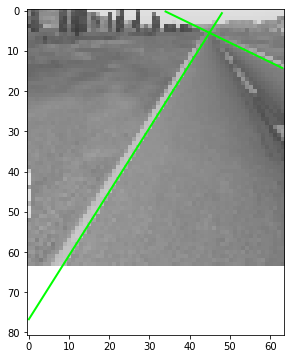

In [17]:
plot_image_with_label_ds(dataset_dir, '2.png')

In [10]:
dataset_dir = '/scratch/smkatz/class/CS231A/E16Data/'
filename = '0.png'
img = np.array(cv2.cvtColor(cv2.imread(dataset_dir + filename),
               cv2.COLOR_BGRA2BGR)[:, :, ::-1])
data = labels.loc[labels['filename'] == filename].iloc[0]
right_labels = data['rightx1'], data['righty1'], data['rightx2'], data['righty2']
left_labels = data['leftx1'], data['lefty1'], data['leftx2'], data['lefty2']
img_grayscale, right_line, left_line = downsample_image_v2(
    img, right_labels, left_labels)

In [11]:
def to_angle_offset(line):
    a, b, c = line
    phi = np.arctan(b / a)
    rho = c / np.sqrt(a**2 + b**2)
    return rho, phi

In [12]:
def from_angle_offset(rho, phi):
    a = np.cos(phi)
    b = np.sin(phi)
    c = rho * np.sqrt(a**2 + b**2)
    return np.array([a, b, c])

In [13]:
rho, phi = to_angle_offset(right_line)
print(rho, phi)
right_line_prime = from_angle_offset(rho, phi)
print(right_line)
print(right_line_prime)
print(right_line_prime / right_line)

16.050744992170706 1.0558416971297344
[-1.66066656 -2.93465327 54.12220581]
[ 0.49249536  0.87031507 16.05074499]
[-0.29656487 -0.29656487  0.29656487]


In [152]:
to_angle_offset(left_line)

(-274.33474991741474, -1.209550006672061)